In [1]:
from Game import *

Version:  0.2.30


## Game functions

In [2]:
def initial_state(N=21):
    return N

def show_state(state):
    print("There are ",state,"sticks")
    
def valid_moves(state,player):
    if state==2:
        return [1,2]
    elif state==1:
        return [1]
    else:
        return [1,2,3]
    
def update_state(state,player,move):
    new_state=state-move
    return new_state

def win_status(state,player):
    # the state is *after* the move for the player
    if state==1:
        return "win"
    
    if state==0:
        return "lose"
    
    return None # mid-game

## Agent Functions

In [3]:
def human_move(state,player):
    move=int(input("how many sticks to take (1,2, or 3?"))
    return move
human_agent=Agent(human_move)    

In [4]:
def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move


random_agent=Agent(random_move)

In [5]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

## Skittles Agent

In [18]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2  # initial number of skittles
    
    move=weighted_choice(T[state])
    
    if move is None:  
        
        # learn
        if learning:
            if last_state:
                T[last_state][last_action]-=1 # take away a skittle
                if T[last_state][last_action]<0:
                    T[last_state][last_action]=0
    
        return random_move(state,player)
    else:
        return move

In [19]:
def skittles_after(status,player,info):
    # not return anything but...
    # will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    if learning:
        if status=='lose':  # only learn when you lose
            T[last_state][last_action]-=1 # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0

In [20]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()  # makes an empty table
skittles_agent.learning=True

## Running the Game

In [21]:
g=Game(number_of_games=20)
g.display=False
g.run(random_agent,skittles_agent)

[1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1]

In [26]:
N_train=5
N_test=100
iteration_count=0

skittles_agent.T=Table()  # makes an empty table

percentage_won=[]
number_of_iterations=[]

for i in range(80):

    skittles_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    result=g.run(random_agent,skittles_agent)


    # turn learning off to test
    skittles_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    result=g.run(random_agent,skittles_agent)
    iteration_count+=N_train

    percentage_won.append(result.count(2)/N_test*100)
    number_of_iterations.append(iteration_count)


In [27]:
%matplotlib inline
from pylab import plot,xlabel,ylabel,legend

Text(0, 0.5, 'Percentage Won')

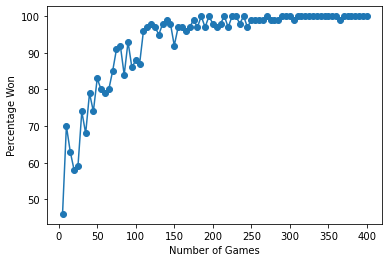

In [28]:
plot(number_of_iterations,percentage_won,'-o')
xlabel('Number of Games')
ylabel('Percentage Won')